In [1]:
import numpy as np
from scipy.fftpack import fft2
import ConnectivityKernel as ck
import matplotlib.pyplot as pt
import FiringRate as fr
import NeuralFieldFFT as nf
from scipy.integrate import ode
import InitialConditions as ic
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
nx = 500 # Number of points in the x space grid
Lx = -60
Ux = 60 # x-space grid limits
hx = 2*Ux/nx
xs = np.linspace(Lx, Ux-hx, nx) # nx equally spaced points between -Lx and Lx-hx
xx,yy = np.meshgrid(xs,xs)

In [3]:
b = 0.4
kernel = ck.ConnectivityKernel2(b)

In [4]:
wHat = fft2( kernel(xx,yy) )

In [5]:
# Initialize Firing Rate
mu = 3
theta = 5.6
f_rate = fr.FiringRate2(mu, theta)

In [9]:
# Initialize Neural Field
neuralField = nf.NeuralFieldFFT(f_rate, wHat, Ux, nx)

In [11]:
# Initial Conditions
#_A = 6; _L = 5.77 # parameters for initial condition 1
_A = 2; _L = 100 # parameters for initial condition 2
initCond = ic.InitialCondition2(_A, _L)
u0 = initCond(xx, yy)
u0 = u0.flatten() # to vector

In [12]:
# Runge-Kutta 4
method = ode(neuralField).set_integrator("dopri5")
method.set_initial_value(u0)
final_t = 15; dt = 0.1
us = []; time_points = []
while method.t < final_t:
    next_t = method.t+dt
    time_points.append(next_t)
    next_u = method.integrate(next_t)
    us.append(next_u)

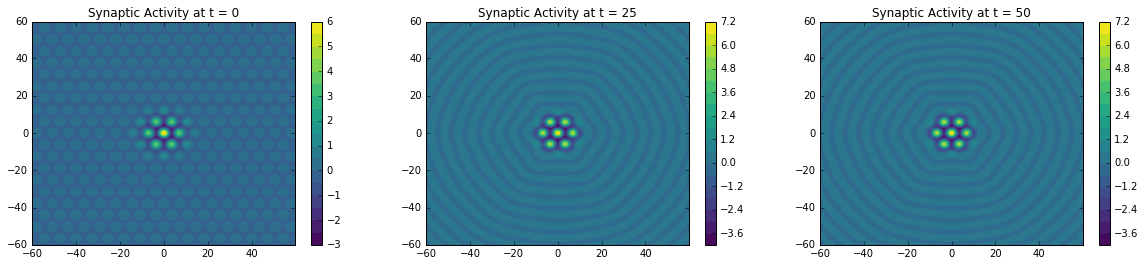

In [13]:
# Plot results
fig = pt.figure(figsize=(20,4))

# Plot initial time
ax1 = fig.add_subplot(131)
uu0 = u0.reshape( (nx,nx) ).T
cont1 = ax1.contourf(xx, yy, uu0, 20, cmap=pt.get_cmap('viridis'))
ax1.set_title("Synaptic Activity at t = 0")
pt.colorbar(cont1)

# Plot half time
ax2 = fig.add_subplot(132)
un_2 = us[int(len(time_points)/2)].reshape( (nx,nx) ).T
cont2 = ax2.contourf(xx, yy, un_2, 20, cmap=pt.get_cmap('viridis'))
ax2.set_title("Synaptic Activity at t = "+str(int(final_t/2)))
pt.colorbar(cont2)

# Plot final time
ax3 = fig.add_subplot(133)
un = us[-1].reshape( (nx,nx) ).T
cont3 = ax3.contourf(xx, yy, un, 20, cmap=pt.get_cmap('viridis'))
ax3.set_title("Synaptic Activity at t = "+str(final_t))
pt.colorbar(cont3)